In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings('ignore')

from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from nltk.corpus import stopwords

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shree123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shree123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# import data
main_df = pd.read_csv('C:\\Users\\Shree123\\OneDrive\\Desktop\\nlp_project\\Data\Mental-Health-Twitter.csv')

In [9]:
df = main_df[['post_text','label']]
df.head()

,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1


In [10]:
# Checking Null values in the dataset
df.isnull().sum()

post_text    0
label        0
dtype: int64

In [11]:
# Character count
max_len = max(df['post_text'].apply(len))
print(f'Maximum Character Length in the Corpus :: {max_len}')

min_len = min(df['post_text'].apply(len))
print(f'Minimum Character Length in the Corpus :: {min_len}')

df['char_count'] = df['post_text'].apply(len)
df['word_count'] = df['post_text'].apply(lambda x: len(sent_tokenize(x)))
df['sentence_count'] = df['post_text'].apply(lambda x: len(sent_tokenize(x)))

Maximum Character Length in the Corpus :: 169
Minimum Character Length in the Corpus :: 4


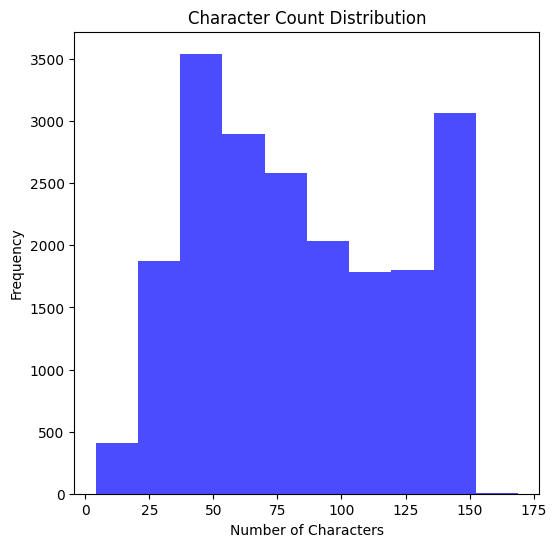

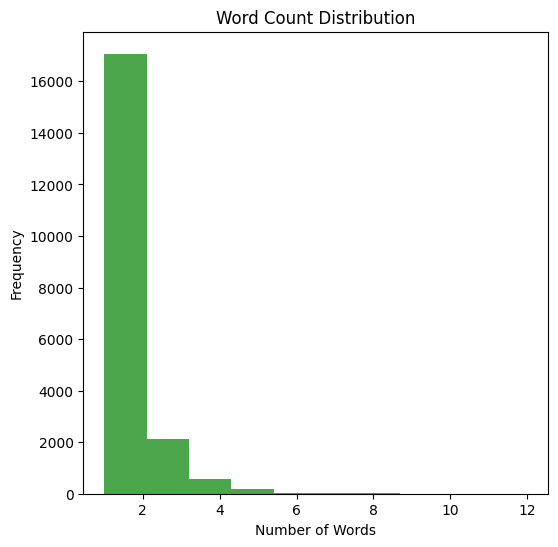

In [12]:
# Plot distributions of text lengths
plt.figure(figsize=(6, 6))
plt.hist(df['char_count'], bins=10, color='blue', alpha=0.7)
plt.title('Character Count Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 6))
plt.hist(df['word_count'], bins=10, color='green', alpha=0.7)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Number of unique words: 22380
Most common words: [('https', 5709), ('rt', 3838), ('http', 3332), ('like', 988), ('depression', 881), ('one', 703), ('get', 607), ('love', 593), ('know', 581), ('people', 574)]


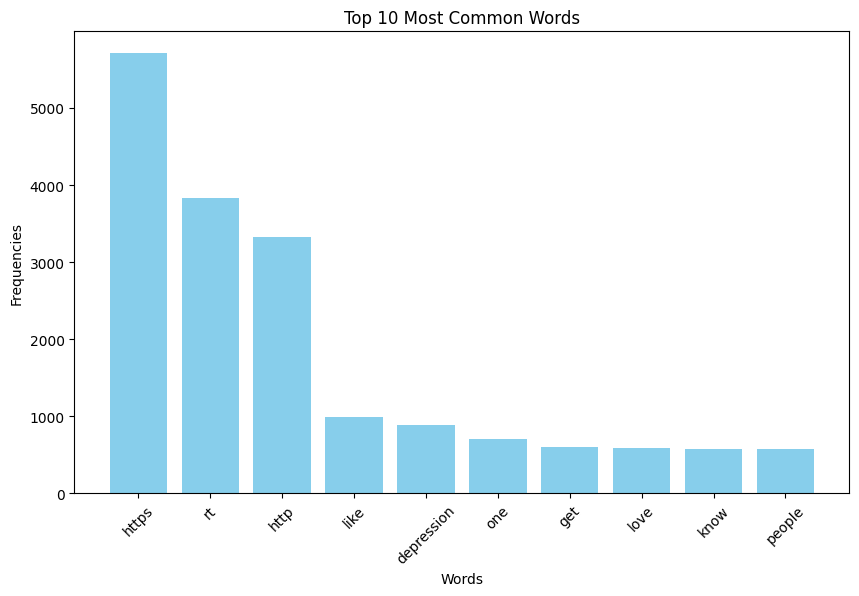

In [13]:
all_words = ' '.join(df['post_text']).lower()
tokens = word_tokenize(all_words)
tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]

# Counting unique words
unique_words = set(tokens)
print(f'Number of unique words: {len(unique_words)}')

# Identifying the most common words and their frequencies
word_freq = Counter(tokens)
common_words = word_freq.most_common(10)
print('Most common words:', common_words)

words, frequencies = zip(*common_words)

# Visualizing the common words
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [14]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    return text

df['cleaned_post_text'] = df['post_text'].apply(preprocess_text)

In [15]:
df[df['label'] == 0].head(10)

,post_text,label,char_count,word_count,sentence_count,cleaned_post_text
10000,"MY ENEMY'S INVISIBLE , I DON'T KNOW HOW TO FIGHT",0,48,1,1,enemys invisible dont know fight
10001,im gonna burn my house down into an ugly brack,0,46,1,1,im gon na burn house ugly brack
10002,@HOT_cocoa_____ counterattack,0,29,1,1,hotcocoa counterattack
10003,@noob_aspe810 golden.ta-chi,0,27,1,1,noobaspe goldentachi
10004,lol or spl or drow,0,18,1,1,lol spl drow
10005,@hure2233 lime39.5648,0,21,1,1,hure lime
10006,RT @LeagueOfLegends: PBE Preview: Warring King...,0,91,1,1,rt leagueoflegends pbe preview warring kingdom...
10007,RT @LeagueOfLegends: PBE Preview: Heartseeker ...,0,86,1,1,rt leagueoflegends pbe preview heartseeker qui...
10008,Why cant i see,0,14,1,1,cant see
10009,ARROW,0,5,1,1,arrow


In [16]:
df[df['label'] == 1].head(10)

,post_text,label,char_count,word_count,sentence_count,cleaned_post_text
0,It's just over 2 years since I was diagnosed w...,1,140,2,2,years since diagnosed anxiety depression today...
1,"It's Sunday, I need a break, so I'm planning t...",1,95,1,1,sunday need break im planning spend little tim...
2,Awake but tired. I need to sleep but my brain ...,1,64,2,2,awake tired need sleep brain ideas
3,RT @SewHQ: #Retro bears make perfect gifts and...,1,140,3,3,rt sewhq retro bears make perfect gifts great ...
4,It’s hard to say whether packing lists are mak...,1,133,1,1,hard say whether packing lists making life eas...
5,Making packing lists is my new hobby... #movin...,1,52,1,1,making packing lists new hobby movinghouse
6,At what point does keeping stuff for nostalgic...,1,110,2,2,point keeping stuff nostalgic reasons cross li...
7,Currently in the finding-boxes-of-random-shit ...,1,92,2,2,currently findingboxesofrandomshit packing pha...
8,"Can't be bothered to cook, take away on the wa...",1,57,1,1,cant bothered cook take away way 😁👍🏼 lazy
9,RT @itventsnews: ITV releases promo video for ...,1,125,1,1,rt itventsnews itv releases promo video final ...


In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

vader_analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer(text):
    scores = vader_analyzer.polarity_scores(text)
    compound_score = scores['compound']
    return 'positive' if compound_score >= 0 else 'negative'    

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shree123\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
df['sentiment'] = df['cleaned_post_text'].apply(sentiment_analyzer)
df.head()

,post_text,label,char_count,word_count,sentence_count,cleaned_post_text,sentiment
0,It's just over 2 years since I was diagnosed w...,1,140,2,2,years since diagnosed anxiety depression today...,negative
1,"It's Sunday, I need a break, so I'm planning t...",1,95,1,1,sunday need break im planning spend little tim...,positive
2,Awake but tired. I need to sleep but my brain ...,1,64,2,2,awake tired need sleep brain ideas,negative
3,RT @SewHQ: #Retro bears make perfect gifts and...,1,140,3,3,rt sewhq retro bears make perfect gifts great ...,positive
4,It’s hard to say whether packing lists are mak...,1,133,1,1,hard say whether packing lists making life eas...,positive


<Axes: title={'center': 'Class Distribution'}, xlabel='sentiment'>

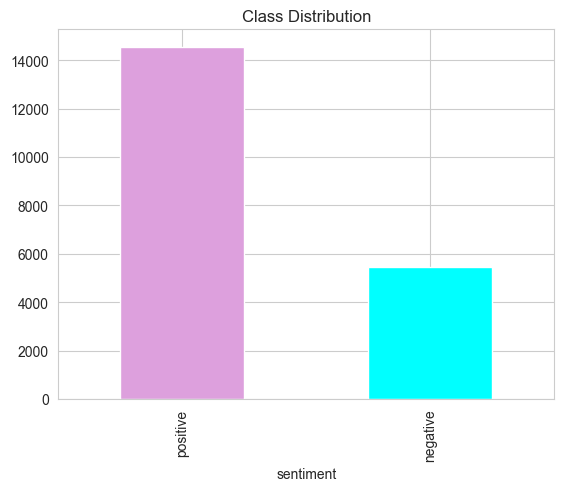

In [19]:
result= df['sentiment'].value_counts()
sns.set_style('whitegrid')
sns.despine(left=True, bottom=True)
plt.title('Class Distribution')
result.plot(kind='bar', color = ['plum','cyan'])

In [20]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['cleaned_post_text'].apply(word_tokenize)
df['tokens']

0        [years, since, diagnosed, anxiety, depression,...
1        [sunday, need, break, im, planning, spend, lit...
2                [awake, tired, need, sleep, brain, ideas]
3        [rt, sewhq, retro, bears, make, perfect, gifts...
4        [hard, say, whether, packing, lists, making, l...
                               ...                        
19995                [day, without, sunshine, like, night]
19996    [borens, laws, charge, ponder, trouble, delega...
19997    [flow, chart, thoroughly, oversold, piece, pro...
19998            [ships, safe, harbor, never, meant, stay]
19999                  [black, holes, god, dividing, zero]
Name: tokens, Length: 20000, dtype: object

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
y = df['sentiment']

vectorizer = CountVectorizer(max_features=5)

X = vectorizer.fit_transform(df['cleaned_post_text'])

print(X.toarray())

[[1 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 ...
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [23]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size= 0.2)

pipeline = Pipeline([
    ('XGB', XGBClassifier()),
    ('CB', CatBoostClassifier())
])



: 

: 